# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d13/570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Blumenau, Santa Catarina, Brazil**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import datetime as dt

mpl.rcParams['agg.path.chunksize'] = 10000

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(13,'570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2')

In [2]:
NOAA = pd.read_csv('570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv')


In [3]:
NOAA['Date'] = pd.to_datetime(NOAA['Date'], format='%Y-%m-%d')
NOAA['Data_Value'] = NOAA['Data_Value'].astype(float)

In [4]:
# max temp per day
TMAX = NOAA[(NOAA['Element'] == 'TMAX') 
            & (NOAA['Date'].dt.year >= 2005) 
            & (NOAA['Date'].dt.year <= 2014)].groupby(['Date'], sort=True)['Data_Value'].max().reset_index()
TMAX_2015 = NOAA[(NOAA['Element'] == 'TMAX') 
            & (NOAA['Date'].dt.year == 2015)].groupby(['Date'], sort=True)['Data_Value'].max().reset_index()

# min temp per day
TMIN = NOAA[(NOAA['Element'] == 'TMIN') 
            & (NOAA['Date'].dt.year >= 2005) 
            & (NOAA['Date'].dt.year <= 2014)].groupby(['Date'], sort=True)['Data_Value'].min().reset_index()

TMIN_2015 = NOAA[(NOAA['Element'] == 'TMIN')
            & (NOAA['Date'].dt.year == 2015)].groupby(['Date'], sort=True)['Data_Value'].min().reset_index()

# change to celsius
TMAX['Data_Value'] = TMAX['Data_Value'] / 10
TMIN['Data_Value'] = TMIN['Data_Value'] / 10
TMAX_2015['Data_Value'] = TMAX_2015['Data_Value'] / 10
TMIN_2015['Data_Value'] = TMIN_2015['Data_Value'] / 10


# grab month and day from date
TMAX['Month'] = TMAX['Date'].dt.strftime('%b')
TMAX['Day'] = TMAX['Date'].dt.day 
TMIN['Month'] = TMIN['Date'].dt.strftime('%b')
TMIN['Day'] = TMIN['Date'].dt.day 
TMAX_2015['Month'] = TMAX_2015['Date'].dt.strftime('%b')
TMAX_2015['Day'] = TMAX_2015['Date'].dt.day 
TMIN_2015['Month'] = TMIN_2015['Date'].dt.strftime('%b')
TMIN_2015['Day'] = TMIN_2015['Date'].dt.day 
# remove date
# TMAX.drop(['Date'], inplace=True, axis=1)
# TMIN.drop(['Date'], inplace=True, axis=1)
# TMAX.set_index('Date', inplace=True)
# TMIN.set_index('Date', inplace=True)

# sort by month, day and get max value per day
TMAX = TMAX.groupby(['Month', 'Day'], sort=False).max().reset_index()
TMIN = TMIN.groupby(['Month', 'Day'], sort=False).min().reset_index()
TMAX_2015 = TMAX_2015.groupby(['Month', 'Day'], sort=False).max().reset_index()
TMIN_2015 = TMIN_2015.groupby(['Month', 'Day'], sort=False).min().reset_index()

'''
No value breaks the record low or high for 2004-2014 in 2015. 
Therefore, I have plotted in comparison per day record highs or lows vs 2015.

The prints shows the Max and Min for 2004-2014 and 2015 to demonstrate my point that I cannot
achieve the exact graph required.
'''

print("Max: {}".format(TMAX.sort_values('Data_Value').max()))
print("Min: {}".format(TMIN.sort_values('Data_Value').min()))
print("Max: {}".format(TMAX_2015.sort_values('Data_Value').max()))
print("Min: {}".format(TMIN_2015.sort_values('Data_Value').min()))

Max: Month                         Sep
Day                            31
Date          2014-12-31 00:00:00
Data_Value                   46.7
dtype: object
Min: Month                         Apr
Day                             1
Date          2005-01-01 00:00:00
Data_Value                    -12
dtype: object
Max: Month                         Sep
Day                            31
Date          2015-12-31 00:00:00
Data_Value                   45.1
dtype: object
Min: Month                         Apr
Day                             1
Date          2015-01-01 00:00:00
Data_Value                   -9.8
dtype: object


In [5]:
# remove leap days

TMAX = TMAX[~((TMAX['Date'].dt.year % 4 == 0) & 
           ((TMAX['Date'].dt.year % 100 != 0) | (TMIN['Date'].dt.year % 400 == 0)) & 
           (TMAX['Date'].dt.month == 2) & (TMIN['Date'].dt.day == 29))]
TMIN = TMIN[~((TMIN['Date'].dt.year % 4 == 0) & 
           ((TMIN['Date'].dt.year % 100 != 0) | (TMIN['Date'].dt.year % 400 == 0)) & 
           (TMIN['Date'].dt.month == 2) & (TMIN['Date'].dt.day == 29))]

In [6]:
# compare dataframes and remove anything less/greater than or equal to 2015 temperatures

mergedMax = TMAX.merge(TMAX_2015, left_index=True, right_index=True, how='inner')
mergedMax.reset_index(level=0, inplace=True)
mergedMax = mergedMax[mergedMax['Data_Value_x'] <= mergedMax['Data_Value_y']]
mergedMin = TMIN.merge(TMIN_2015, left_index=True, right_index=True, how='inner')
mergedMin.reset_index(level=0, inplace=True)
mergedMin = mergedMin[mergedMin['Data_Value_x'] >= mergedMin['Data_Value_y']]

/Users/jessequinn/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


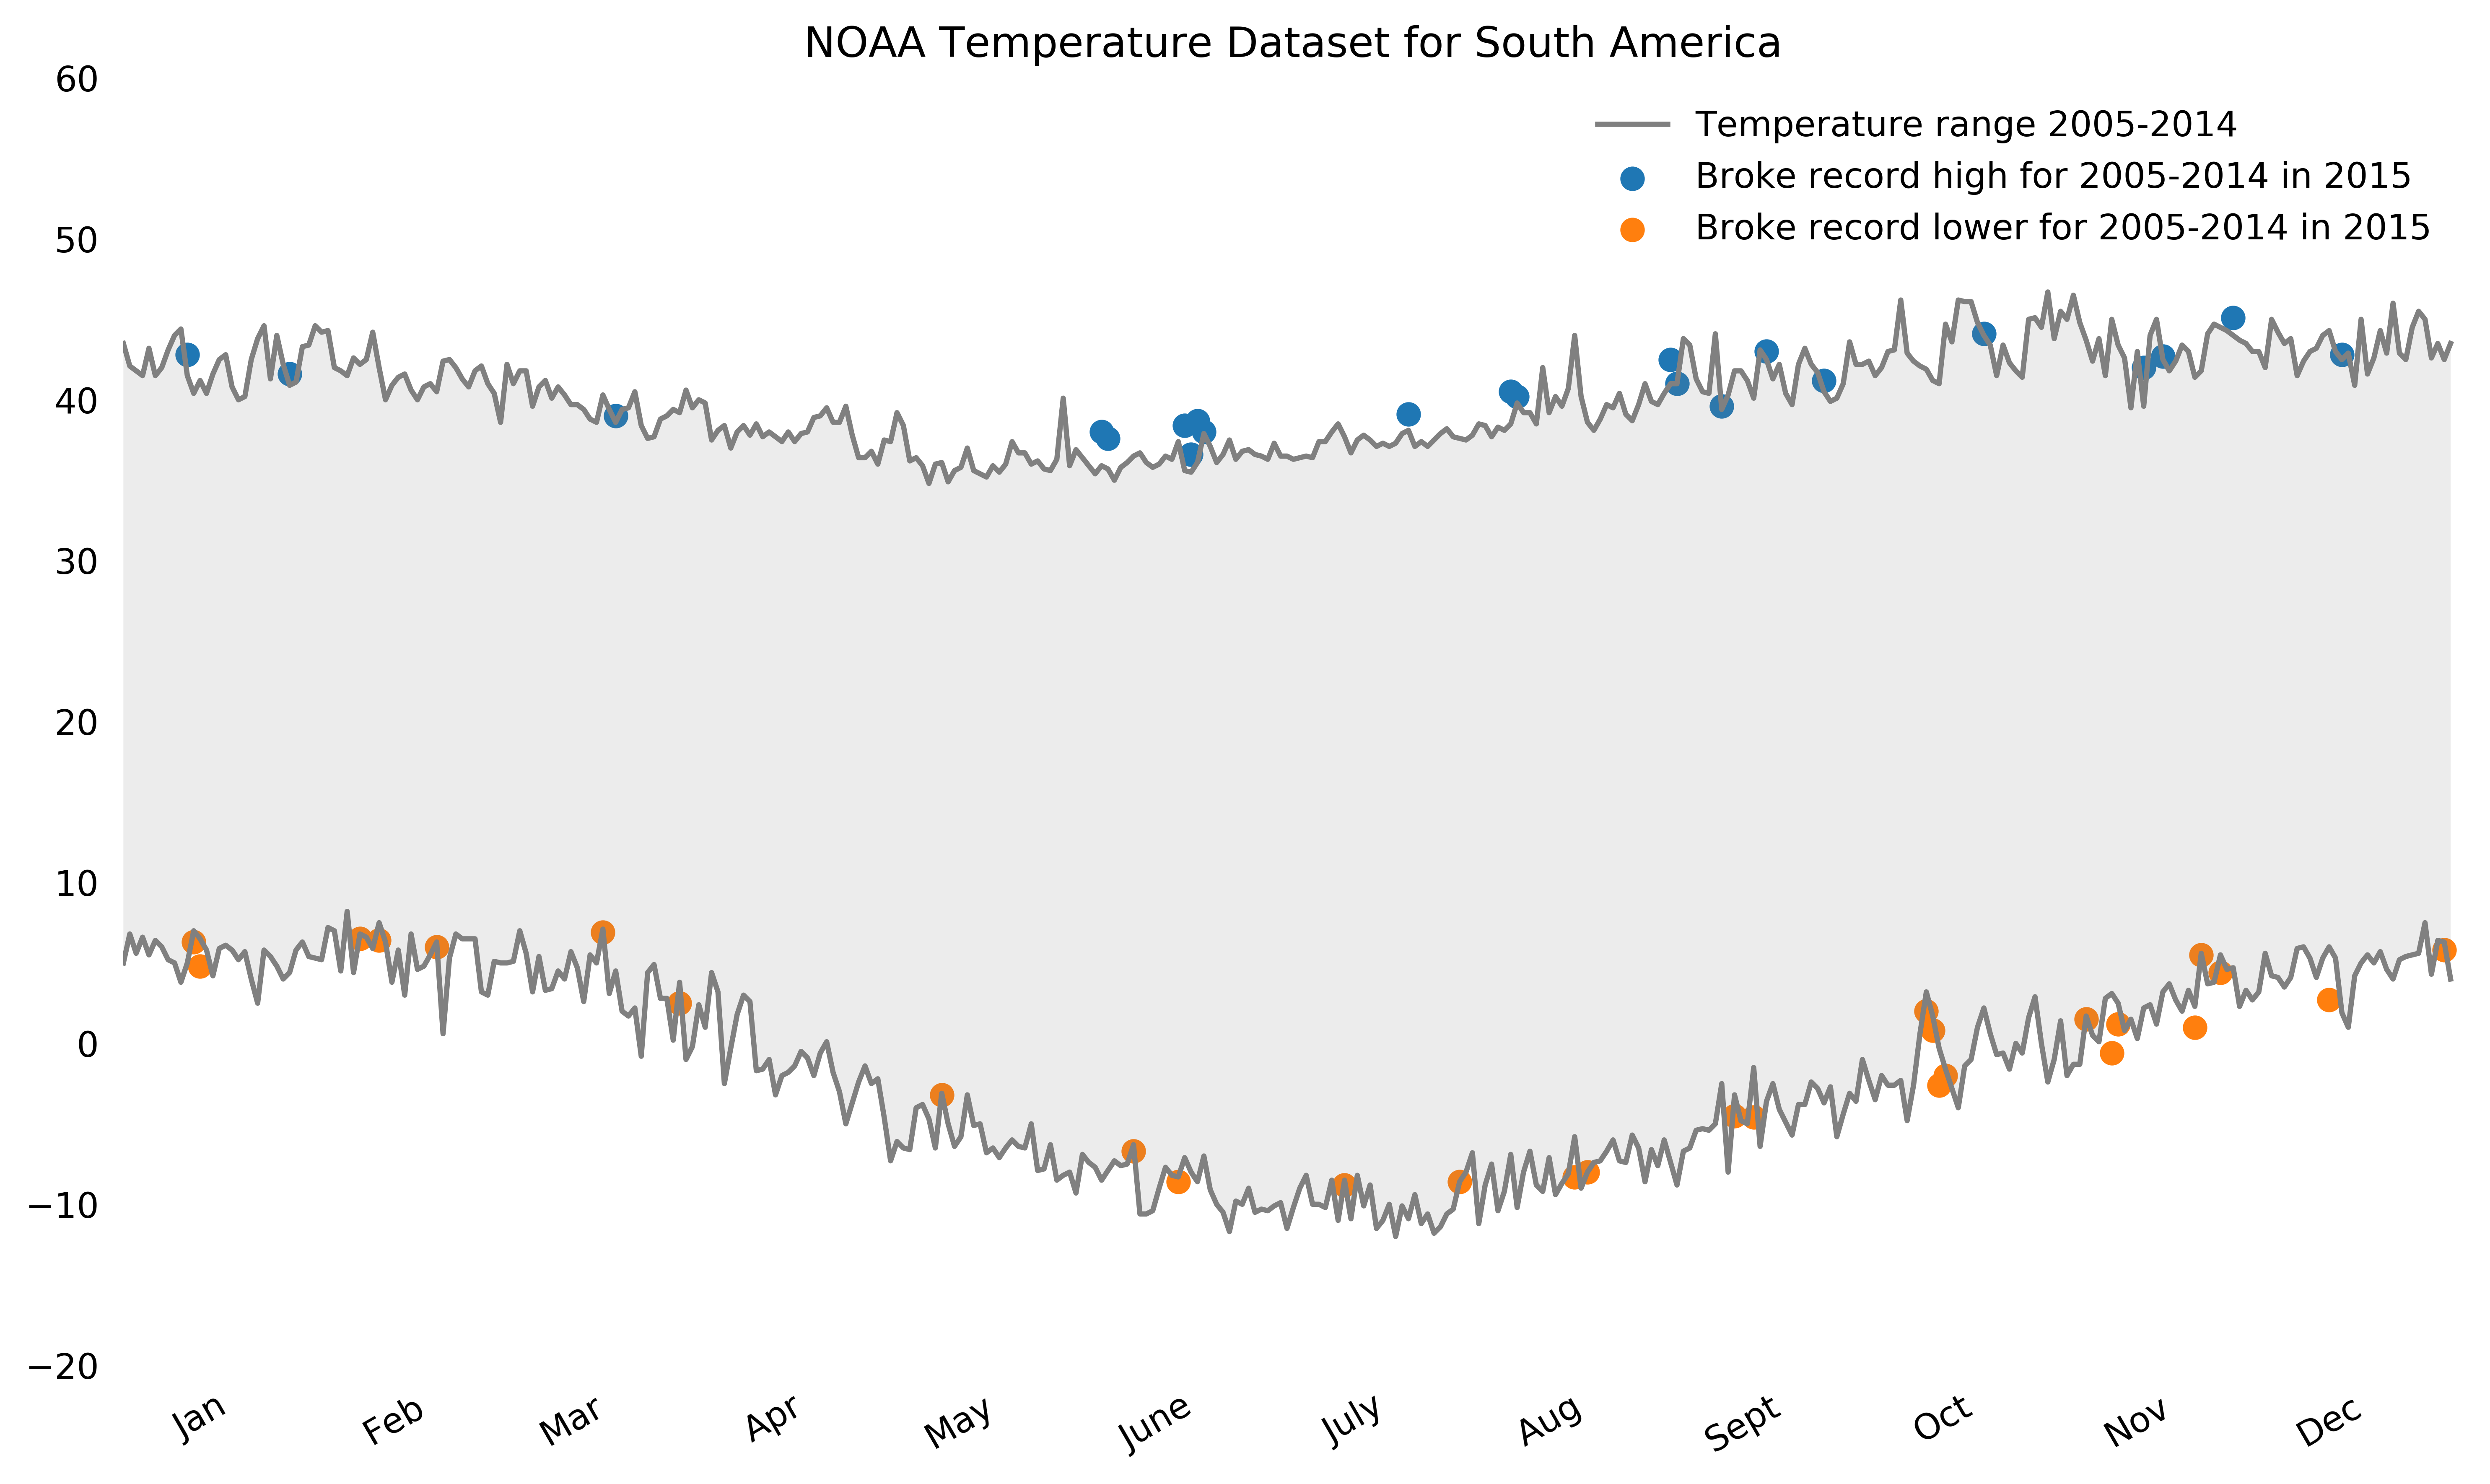

In [15]:
'''
Read the documentation and familiarize yourself with the dataset, 
then write some python code which returns a line graph of the record 
high and record low temperatures by day of the year over the period 
2005-2014. The area between the record high and record low 
temperatures for each day should be shaded.
'''

'''
Overlay a scatter of the 2015 data for any points (highs and lows) 
for which the ten year record (2005-2014) record high or record low 
was broken in 2015.
'''

fig = plt.figure(figsize=(10,6), dpi=600)
canvas = FigureCanvasAgg(fig)
ax = fig.add_subplot(111)

# line plots
ax.plot(TMAX['Data_Value'], c='gray', label='_nolegend_')
ax.plot(TMIN['Data_Value'], c='gray')

# scatter plots
ax.scatter(mergedMax['index'], mergedMax['Data_Value_y'])
ax.scatter(mergedMin['index'], mergedMin['Data_Value_y'])

# formatting
plt.gca().fill_between(range(len(TMAX)), TMIN['Data_Value'], TMAX['Data_Value'], facecolor='gray', alpha=0.15)
ax.set_xlim(0,366)
ax.set_ylim(-20,60)
ax.grid(False)
ax.set_facecolor('white')
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
ticks = [(dt.date(2017,months,1)-dt.date(2016,12,15)).days for months in range(1,13)]
ax.set_xticks(ticks)
ax.set_xticklabels(months)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.autofmt_xdate()
plt.title('NOAA Temperature Dataset for South America')
leg = plt.legend(['Temperature range 2005-2014', 'Broke record high for 2005-2014 in 2015', 'Broke record lower for 2005-2014 in 2015'])
leg.get_frame().set_linewidth(0.0)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.tight_layout()
canvas.print_png('NOAA.png')




In [16]:
%%html
<img src='NOAA.png' />